Разведывательный анализ временных рядов.

План работ

Разведывательный анализ временных рядов. Знакомство с библиотекой Pandas и
методами работы с временными рядами в ней. Знакомство с библиотекой seaborn и
методами визуализации временных рядов.

Импорт Pandas и вспомогательных библиотек

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates#Date Parser

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

Начальный анализ библиотеки Pandas
Набор данных
Рассмотрим
набор
данных
Open
Power
Systems
Data.
В
наборе
данных
производство и потребление электричества декларируется как общее ежедневное
потребление в Гига Ваттах в час (GWh).
В файле данные разбит на колонки как:

•
Date — дата в формате (гггг-мм-дд)

•
Consumption — Потребление в ГВт (GWh)

•
Wind — Производство веторэнергии в ГВт (GWh)

•
Solar — Производство солнечной энергии в ГВт (GWh)

•
Wind+Solar — Суммарное производства по двум предыдущим столбцам GWh


In [3]:
path_ts = 'https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv'
df = pd.read_csv(path_ts)
df.sample(15, random_state=0)

,Date,Consumption,Wind,Solar,Wind+Solar
965,2008-08-23,1152.011,NaN,NaN,NaN
2776,2013-08-08,1291.984,79.666,93.371,173.037
1334,2009-08-27,1281.057,NaN,NaN,NaN
3561,2015-10-02,1391.050,81.229,160.641,241.870
1248,2009-06-02,1201.522,NaN,NaN,NaN
3320,2015-02-03,1639.260,97.155,27.530,124.685
2339,2012-05-28,988.853,36.311,151.315,187.626
2016,2011-07-10,1023.542,22.717,NaN,NaN
154,2006-06-04,955.373,NaN,NaN,NaN
3944,2016-10-19,1503.565,204.847,38.170,243.017


In [5]:
print(df.shape)


(4383, 5)


Для получения информации по данным можно использовать метод info():

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


Для начала заменим столбец индексов на данные

In [7]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sample(15, random_state=0)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2008-08-23,1152.011,NaN,NaN,NaN
2013-08-08,1291.984,79.666,93.371,173.037
2009-08-27,1281.057,NaN,NaN,NaN
2015-10-02,1391.050,81.229,160.641,241.870
2009-06-02,1201.522,NaN,NaN,NaN
2015-02-03,1639.260,97.155,27.530,124.685
2012-05-28,988.853,36.311,151.315,187.626
2011-07-10,1023.542,22.717,NaN,NaN
2006-06-04,955.373,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


Посмотрим некоторые итоги анализа при помощи метода describe()

In [9]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Набор данных имеет 4383 строк, в период с 1 января 2006 до 31 декабря 2017
Для просмотра некоторых данных можно использовать методы head() и tail() для
первых и последних нескольких строк.

In [10]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


можно проверить тип данных для каждой колонки

In [12]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

Методы обращения к данным по временным меткам
Теперь можно загрузить данные сразу с использованием специального метода
интерпретации данных. Назначим колонки данных как индексы при чтении. Также
можно отметить, что временные метки можно сразу поделить на части: year,
day.

In [13]:
df = pd.read_csv(path_ts, parse_dates=['Date'], index_col="Date")
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [14]:
df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


Теперь можно обращаться к данным по их индексам.

In [15]:
df.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Name: 2017-08-10 00:00:00, dtype: float64

или по диапазонам индексов

In [16]:
df.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-01-20,1590.687,78.647,6.371,85.018
2014-01-21,1624.806,15.643,5.835,21.478
2014-01-22,1625.155,60.259,11.992,72.251


также можно обращаться к отдельным столбцам в заданном диапазоне индексов с
помощью метода loc:

In [17]:
df.loc['2014-01-20':'2014-01-25', 'Wind']

Date
2014-01-20     78.647
2014-01-21     15.643
2014-01-22     60.259
2014-01-23    125.177
2014-01-24    106.527
2014-01-25    145.786
Name: Wind, dtype: float64

или обращаться к столбцам как методам.

In [18]:
df.Wind.loc['2014-01-20':'2014-01-25']

Date
2014-01-20     78.647
2014-01-21     15.643
2014-01-22     60.259
2014-01-23    125.177
2014-01-24    106.527
2014-01-25    145.786
Name: Wind, dtype: float64

Также можно обращаться к столбцам как к ключевым словам:

In [19]:
df[['Wind']].loc['2014-01-20':'2014-01-25']

,Wind
Date,
2014-01-20,78.647
2014-01-21,15.643
2014-01-22,60.259
2014-01-23,125.177
2014-01-24,106.527
2014-01-25,145.786


Для удобства в фреймворке Pandas также предусмотрен метод обращения по
элементам массива:

In [22]:
df.iloc[0:2,0:3]

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN


Если индексы имеют формат DateTimeIndex можно использовать следующие способы
получения временным меток:

In [23]:
print(df.index.day)
print(df.index.weekday)
print(df.index.year)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=4383)
Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=4383)
Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)


Также можно представлять данные с разной частотой, например с частотой D -для дней,
W,M,Y для недель, месяцев и лет соответственно.

In [24]:
df[['Wind']].loc['2014-01-20':'2014-02-25'].asfreq('W')

,Wind
Date,
2014-01-26,184.365
2014-02-02,107.799
2014-02-09,423.278
2014-02-16,408.778
2014-02-23,183.838


Например, можно взять месяц из временных меток и посмотреть, как он будет
выглядеть в недельном представлении:

In [25]:
df.loc['2012-02'].asfreq('W')

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-02-05,1279.432,55.522,54.572,110.094
2012-02-12,1264.254,62.659,45.176,107.835
2012-02-19,1107.431,272.655,30.382,303.037
2012-02-26,1086.743,95.234,37.214,132.448


Можно также использовать диапазонный тип обращений, как для типа лист в питоне.

In [26]:
df.loc['2012':].asfreq('Y')

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-12-31,969.81000,446.492,25.097,471.589
2013-12-31,1068.42900,174.670,43.219,217.889
2014-12-31,1183.51000,145.511,3.721,149.232
2015-12-31,1158.10300,358.330,20.226,378.556
2016-12-31,1212.56800,315.063,34.580,349.643
2017-12-31,1107.11488,721.176,19.980,741.156


Вот пример для изученных обращений:

In [27]:
df.loc['2012':].asfreq('Y').set_index(df.loc['2012':].asfreq('Y').index.year)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012,969.81000,446.492,25.097,471.589
2013,1068.42900,174.670,43.219,217.889
2014,1183.51000,145.511,3.721,149.232
2015,1158.10300,358.330,20.226,378.556
2016,1212.56800,315.063,34.580,349.643
2017,1107.11488,721.176,19.980,741.156


Также если индексы имеют формат дат, то можно их сгруппировать по заданным
частотам, например W-неделя, 'Y' и A - год, и т.д. Также можно провести группировку по,
например, '2y' - по 2м годам. Методы groupby, resample и asfreq могут быть
использованы
для
группировки.
Как
подведены некоторые итоги, например, sum, mean, median или std. Например, так, как
это показано ниже.

In [28]:
df.groupby(pd.Grouper(freq='1y')).sum()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.53600,0.000,0.000,0.000
2007-12-31,496631.84700,0.000,0.000,0.000
2008-12-31,495570.87600,0.000,0.000,0.000
2009-12-31,459737.42800,0.000,0.000,0.000
2010-12-31,488588.70000,35911.777,0.000,0.000
2011-12-31,484814.08600,44032.951,0.000,0.000
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


In [30]:
df.resample('1y').sum().head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.536,0.000,0.000,0.000
2007-12-31,496631.847,0.000,0.000,0.000
2008-12-31,495570.876,0.000,0.000,0.000
2009-12-31,459737.428,0.000,0.000,0.000
2010-12-31,488588.700,35911.777,0.000,0.000
2011-12-31,484814.086,44032.951,0.000,0.000
2012-12-31,469574.754,45862.667,27887.332,73749.999
2013-12-31,463336.853,47197.832,29559.780,76697.443
2014-12-31,504164.821,51107.672,32498.307,83370.502


In [33]:
df.asfreq('1m').head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1575.129,NaN,NaN,NaN
2006-02-28,1507.490,NaN,NaN,NaN
2006-03-31,1429.066,NaN,NaN,NaN
2006-04-30,1026.352,NaN,NaN,NaN
2006-05-31,1380.175,NaN,NaN,NaN
2006-06-30,1298.103,NaN,NaN,NaN
2006-07-31,1289.926,NaN,NaN,NaN
2006-08-31,1347.763,NaN,NaN,NaN
2006-09-30,1173.168,NaN,NaN,NaN


Чистка данных
При анализе данных необходимо как минимум исключить из них отсутствующие
значения, которые обозначаются как NaN. На самом деле NaN могу быть исключены при
помощи
методов ffill
или bfill.
Например,
method='ffill'). Также можно использовать методы dropna и filna. Но для начала
давайте посчитаем число NaN в наборе данных. Отметим, что также можно использовать
метод isnull вместо isna с тем же эффектом.

In [34]:
df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

Теперь можно заменить отсутствующие значения
Отметим, что значения также можно выкинуть NaN при помощи метода dropna.

In [35]:
df.fillna(0, inplace=True)

In [36]:
df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0


Визуализация данных в Pandas и Seabron
Библиотека Pandas включает ряд методов из библиотеки matplotlib

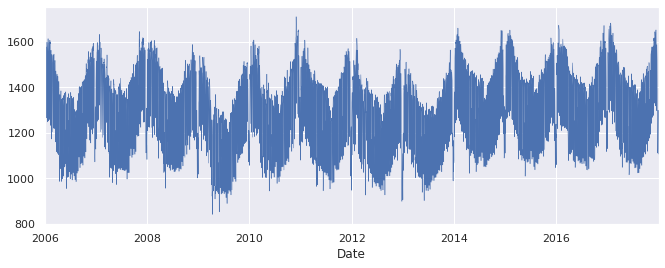

In [37]:
df['Consumption'].plot(linewidth=0.5);

Теперь давайте посмотрим более развернутый пример использования данного метода|

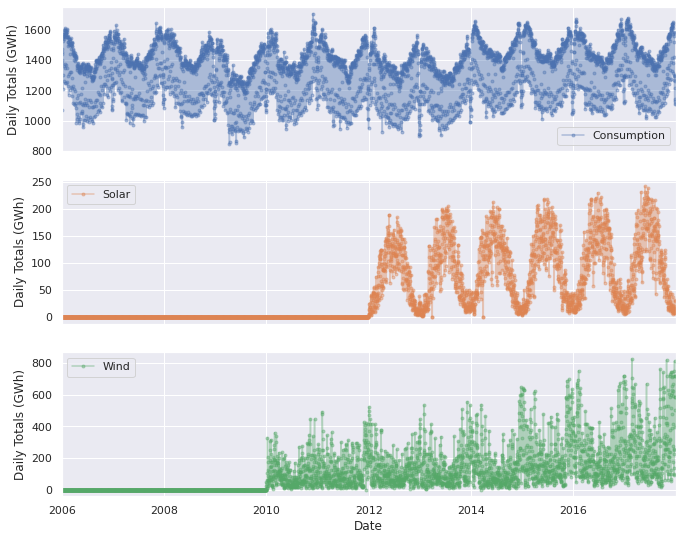

In [39]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_plot].plot(marker='.', alpha=0.4, linestyle='-', figsize=(11, 9),
subplots=True)
for ax in axes:
   ax.set_ylabel('Daily Totals (GWh)')

Также может быть полезно визуализировать общее потребление и потребление
по каждому типу (ветер, солнце) вместе. Отметим, что параметр min_count заменяет
значения NaN на 0

In [42]:
df.resample('M').sum()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.70400,0.000,0.000,0.000
2006-02-28,41078.99300,0.000,0.000,0.000
2006-03-31,43978.12400,0.000,0.000,0.000
2006-04-30,38251.76700,0.000,0.000,0.000
2006-05-31,38858.14300,0.000,0.000,0.000
...,...,...,...,...
2017-08-31,40029.77368,5499.798,4602.808,10102.606
2017-09-30,40078.56092,6287.730,3079.291,9367.021
2017-10-31,42355.21893,12480.097,2130.557,14610.654


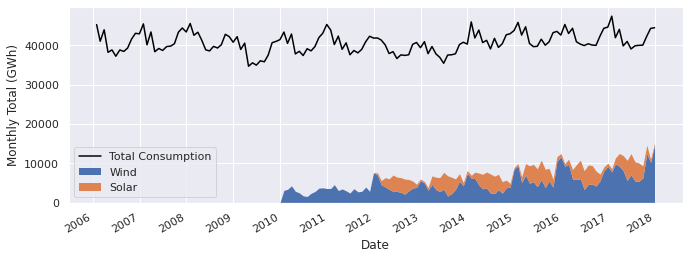

In [44]:
df_monthly = df.resample('M').sum(min_count=7)
fig, ax = plt.subplots()
ax.plot(df_monthly['Consumption'], color='black', label='Total Consumption')
df_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

Теперь можно провести анализ полученных графиков: Графики Consumption,
Solar, и Wind временных рядов осциллируют между локальными минимумами и
максимумами в течение каждого года, что соответствует сезонным изменениям в
погоде в году. Потребление электричества наибольшее зимой и наименьшее летом, что
вполне логично. Можно разделить потребление на два кластера — медленные и
интенсивные
осцилляции,
менее
интенсивный
Предположим, что такие осцилляции связаны с днями недели и месяцами. Выбросы на
графике
2
связаны
с
праздничными
Солнечное электропроизводство максимально летом и минимально зимой. Ветренное
потребление наоборот, что также логично. можно также увидеть растущий тренд в
потреблении ветренной и солнечной энергий.


Описанная выше 2-х кластерное поведение общего энергопотребления может
быть дополнительно выявлено при построении гистограммы. Это показано ниже,
видно два кластера с пиками порядка 1100 и 1400 ГВт Отметим, что иногда полезно


аппроксимировать гистограмму, например, это можно сделать следующим методом 

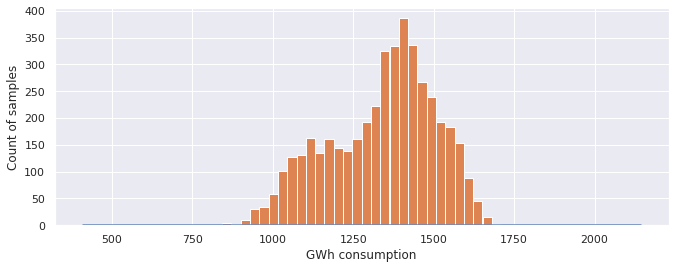

In [45]:
ax= df.Consumption.plot(kind='kde' )
ax = df.Consumption.hist(bins=30)
ax.set_ylabel('Count of samples')
ax.set_xlabel('GWh consumption')
plt.show()

Анализ сезонности
Сезонность и тренд являются двумя наиболее важными составляющими временных
рядов. Однако, сезонность как правило бывает не однородной. Пример ниже
показывает такую неоднородность:

In [47]:
df.loc['2016-05':, 'Consumption']

Date
2016-05-01    1078.60200
2016-05-02    1405.18500
2016-05-03    1462.93500
2016-05-04    1430.13600
2016-05-05    1111.37900
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 610, dtype: float64

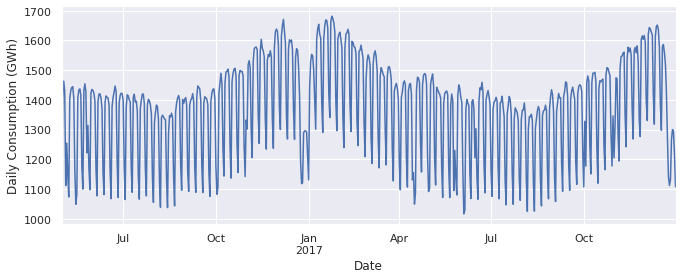

In [46]:
ax = df.loc['2016-05':, 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Следующий график показывает недельные осцилляции в течение нескольких
лет. На этом графике видно, что потребление электричества ниже всего в период
январских праздников.

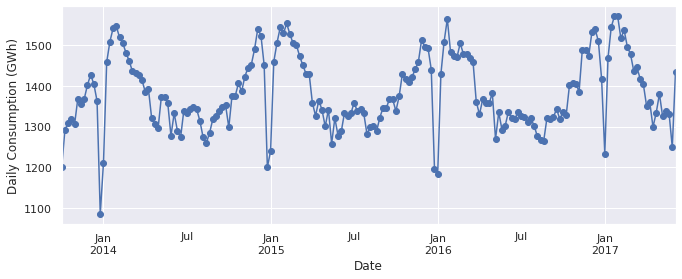

In [48]:
ax = df.loc['2013-10':'2017-05', 'Consumption'].\
resample('W').mean().plot(marker='o', linestyle='-',linewidth=1.5)
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

Иногда полезно проверить как эти провалы выглядят

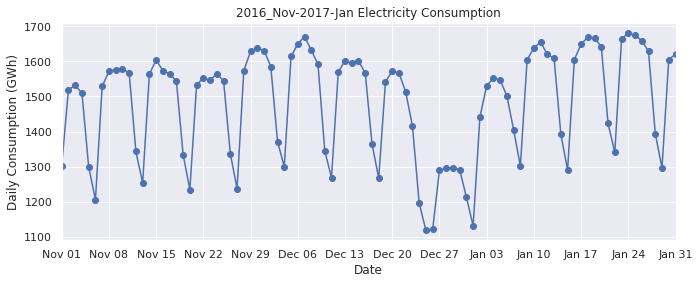

In [49]:
ax = df.loc['2016-11':'2017-01', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('2016_Nov-2017-Jan Electricity Consumption')
# For more convinient ticks (week ticks)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# Format 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.show()

На графике выше видно, что потребление имеет также провалы каждые выходные.

Анализ тренда
Предыдущий анализ показал наличие явного тренда в потреблении ветра и других
параметров. Для выявления тренда может быть использована несколько способов.
Один из наиболее простых и популярных методов это скользящее среднее (rolling
average).


Отметим наиболее точные результаты будут достигнуты, если период
скользящего будет совпадать с периодом сезонности. df.Wind.rolling(365) Но
лучше использовать специальные значения скользящего, например data
frequency, например, '365d'

In [51]:
df[['Wind']].rolling('365d').mean()

,Wind
Date,
2006-01-01,0.000000
2006-01-02,0.000000
2006-01-03,0.000000
2006-01-04,0.000000
2006-01-05,0.000000
...,...
2017-12-27,276.907532
2017-12-28,277.705981
2017-12-29,278.847293


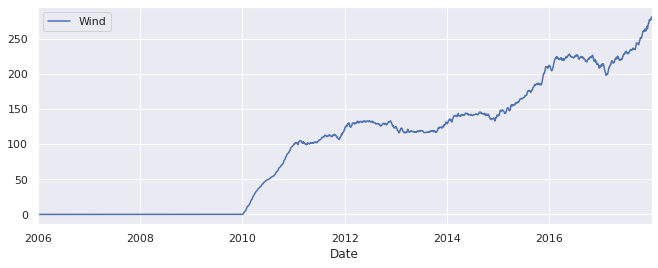

In [50]:
df[['Wind']].rolling('365d').mean().plot( linewidth=1.5, );

Также мы можем проверить тренд при помощи использования типа графика
boxplot - для группировки данных по различным временным периодам и визуализации
результатов по группам.

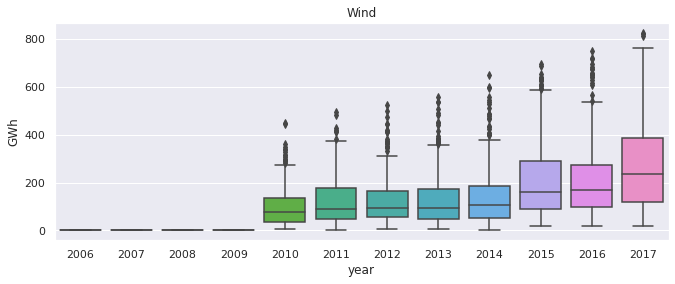

In [52]:
ax = sns.boxplot(data=df, x=df.index.year, y='Wind')
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Wind')
plt.show()

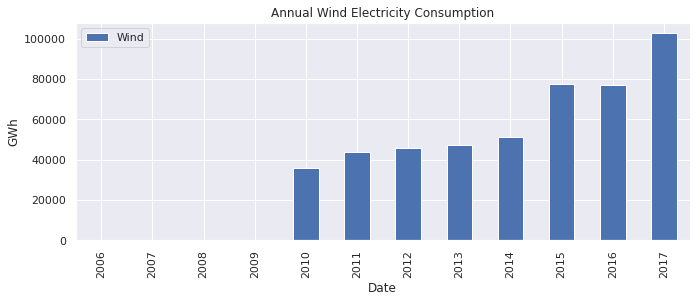

In [53]:
#также можно построить т.н. barplot.
df_test = df[['Wind']].resample('Y').sum()
ax = df_test.set_index(df_test.index.year).plot.bar()
ax.set_title('Annual Wind Electricity Consumption')
ax.set_ylabel('GWh');

В
дополнение
к
предыдущему
можно использовать
специальные
методы
скользящего среднего, например, экспоненциального скользящего среднего (EW).

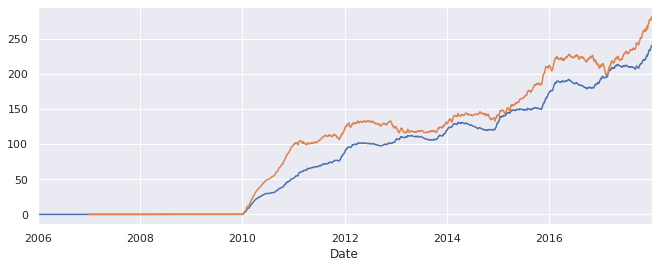

In [54]:
df.Wind.ewm(halflife=365, min_periods=0,adjust=True).mean().plot()
df.Wind.rolling(365).mean().plot();

Еще о сезонности
Также приведенные выше методы позволяют выделить сезонность, например, путем
скользящего среднего по 30 дней.

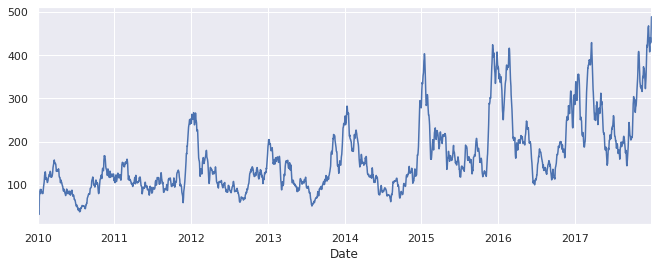

In [55]:
df.loc['2010':, 'Wind'].rolling('30d').mean().plot( linewidth=1.5, );

также можно использовать метод resample для анализа графиков.

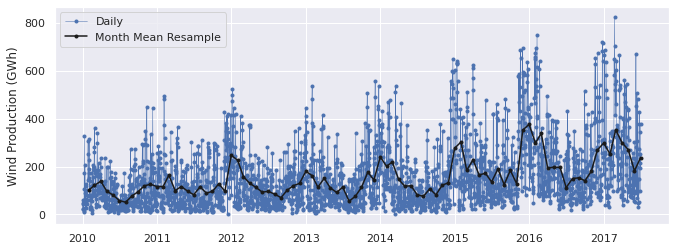

In [56]:
start, end = '2010-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Wind'],marker='.', linestyle='-', linewidth=0.5,
label='Daily')
ax.plot(df.resample('M').mean().loc[start:end, 'Wind'],
        marker='o',
        markersize=3,
        linestyle='-',
        label='Month Mean Resample',
        color='k')
ax.set_ylabel('Wind Production (GWh)')
ax.legend()

График
выше
показывает
некоторую
нестабильность
сезонности.
Такое
поведение можно также проверить с использованием barplot.

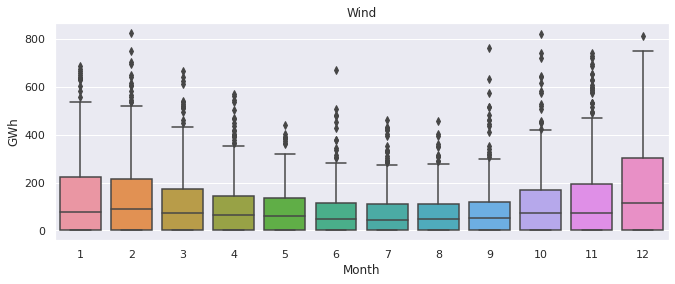

In [57]:
ax = sns.boxplot(data=df, x=df.index.month, y='Wind')
ax.set_ylabel('GWh')
ax.set_xlabel('Month')
ax.set_title('Wind')
plt.show()

График выше показывает, что ветренная энергетика имеет много выбросов, их
можно объяснить например, экстремальными выбросами, штормами или другими
эффектами.

Также ниже показан пример анализа сезонности с использованием сегментов
данных (например, по годам).

In [61]:
list(set(df.index.year))[-4:]

[2012, 2013, 2014, 2015]

In [65]:
df.loc[str(2015):str(2015)+'-12','Wind'].rolling('30d').mean()

Date
2015-01-01    325.128000
2015-01-02    464.343000
2015-01-03    463.879667
2015-01-04    444.165750
2015-01-05    398.641200
                 ...    
2015-12-27    407.423600
2015-12-28    397.823133
2015-12-29    384.789733
2015-12-30    377.056867
2015-12-31    375.578033
Name: Wind, Length: 365, dtype: float64

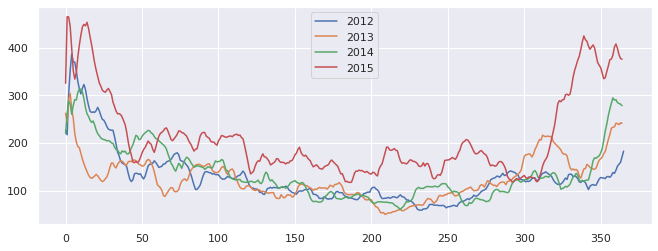

In [62]:
for year in list(set(df.index.year))[-4:]:
   plt.plot(df.loc[str(year):str(year)+'-12',            
       'Wind'].rolling('30d').mean().values, label=year)
plt.legend()

Тут видно, что сезонность не стационарна и нестабильна с растущей
интенсивностью от года к году. Как было упомянуто выше в анализируемых данных
можно выделить два типа сезонности: дневную и месячную. Пример ниже показывает
анализ сезонности по дням недели.

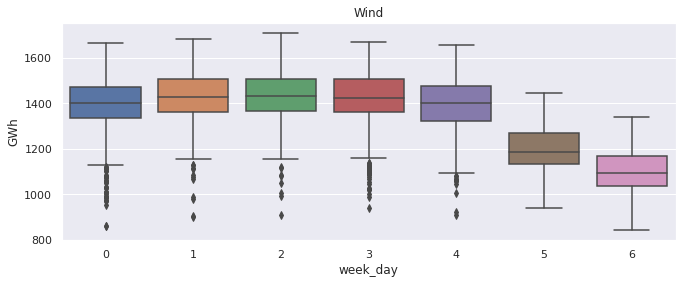

In [66]:
ax = sns.boxplot(data=df, x=df.index.weekday, y='Consumption');
ax.set_ylabel('GWh')
ax.set_xlabel('week_day')
ax.set_title('Wind')
plt.show()

На графике ниже не видно, что потребление энергии наименьшее в выходные.
Отметим нулевой день тут - понедельник.